# Final Python Assignment

Use the following table to provide us with

|name | student number|
|----|----|
|Thomas Ruijgers| U1258931|
|other group member's name| student number|

# Read this carefully

This is the final assignment for python. You also need to make the R part of this final assignment. 

With this python part of the final assignment, you can earn 4 points.

This assignment needs to be uploaded June 13 (23:59 at the latest). You cannot use this assignment for the resit!

After you have finished this exam, do the following:

* upload your python and R files to github
* create two links in your README file:

    * one link to "final python assignment"
    * one link to "final R assignment"

* fill in the google form (see link on Blackboard) that you have uploaded your files
* use the same student number you gave us before, otherwise we cannot retrieve your pass/fail grades


# Bargaining model

In the python lectures we considered a two period bargaining model. In the assignment of week 5, we extended this to a three period model.

In this final assignment we are going to extend the model to $n$ periods, where $n$ is a variable.

Although in the lectures and assignments we worked with plotly to make graphs, here we will use [matplotlib](https://matplotlib.org/). Hence, you need to google to see how plots are made using this library. An important aspect of using open source software is that you can figure out yourself how to use (new) things.


# Import libraries

First, we need to import some libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1)** [0.5 point] Use `np.arrange` to create a list of offers between 0.0 and 10.0 (including 10.0) with step 0.1:

In [3]:
min_offer = 0.0
max_offer = 10.0
step = 0.1
offers = np.arange(min_offer,max_offer+0.1,0.1)

The first two lines define minimum and maximum offer respectively. The third line defines the minimum "step" between potential offers. The fourth line contains the variable offers which makes use of the function np.arange. The end of the interval is "max_offer+0.1" so as to include 10 as a potential offer.

---

**2)** [0.5 point] Introduce the functions `accept_offer` and `make_offer` as in the lecture:

In [4]:
def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept

def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1 # no offer is made
        your_profit = your_outside_option
        other_profit = other_outside_option
    return your_offer, your_profit, other_profit

First accept_offer is defined as to accept an offer which is greater than or equal to your outside option. Next up is the make_offer which is set to return the offer you've made, your profit and the other player's profit. If your optimal offer is strictly smaller than your outside option, your_offer will be equal to -1 (no offer is made). In this case your_profit and other_profit merely return the outside options for both players.

---

**3)** [0.5 point] Initialize a dictionary `offer` as in the assignment of week 5:

In [5]:
offer = {}

The variable offer = {} gives a dictionary of outside options as a function (key) of period.

---

**4)** [0.5 point] Complete the following function such that it returns the payoffs to players 1 and 2 for a game of length $n$ periods when the discount factor is given by $\delta$:

In [6]:
def outcome(n, delta):
    offer[n+1]=[0,0,0]
    for i in range(n):
        offer[n-i]= make_offer(delta*offer[(n-i)+1][2], delta*offer[(n-i)+1][1])
    return offer

Outcomes is defined as to return the offer and profits of period n-i; for these computations the discount factor delta as well as the profits of the next period are required. The delta was given and the profits are provided by offer [(n-i)+1][2] and offer [(n-i)+1][1].

---

**5)** [0.5 point] Check the outcomes for the case where $\delta = 0.9$, $n=1, 2$ and $n=3$ (these are outcomes that you have seen before).

In [7]:
delta = 0.9
n= 1
outcome(n, delta)

{1: (0.0, 10.0, 0.0), 2: [0, 0, 0]}

In [8]:
delta = 0.9
n= 2
outcome(n, delta)

{1: (9.0, 1.0, 9.0), 2: (0.0, 10.0, 0.0), 3: [0, 0, 0]}

In [9]:
delta = 0.9
n= 3
outcome(n, delta)

{1: (0.90000000000000002, 9.0999999999999996, 0.90000000000000002),
 2: (9.0, 1.0, 9.0),
 3: (0.0, 10.0, 0.0),
 4: [0, 0, 0]}

The outputs are the same as in the week 5 Assignment, with an agreement being reached in the first period.

---

**6)** [1 point] *Using matplotlib* plot for the case with $\delta =0.9$, the payoff for player 1 of a game that lasts for 1 round, a game that lasts for 2 rounds, up till a game that lasts 30 rounds. On the horizontal axis, we have the length of the game $n$; on the vertical axis the payoff to player 1.

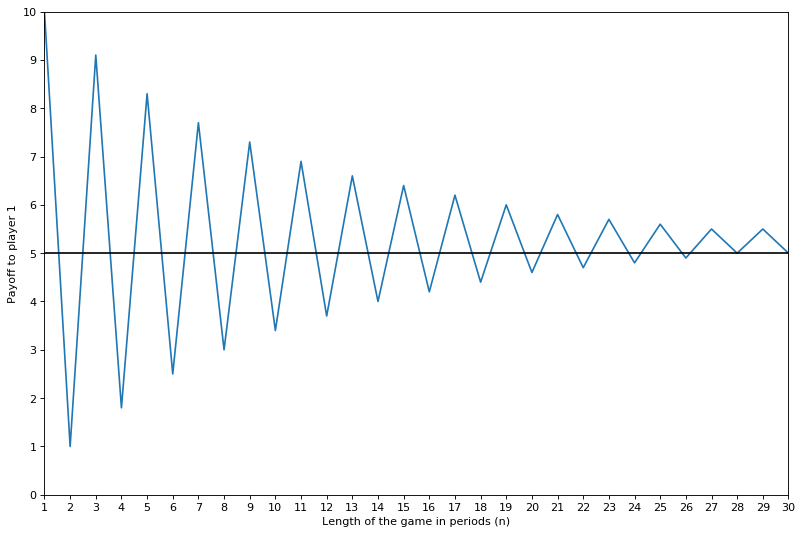

In [84]:
n=30
delta = 0.9
range_n = np.arange(0,31,1)
p1payoff = [outcome(n,delta)[1][1] for n in range(31)]
plt.figure(figsize=(12, 8), dpi=80)
plt.axis([1, 30, 0, 10])
plt.xlabel("Length of the game in periods (n)")
plt.ylabel("Payoff to player 1")
plt.xticks(np.linspace(1, 30, 30, endpoint=True))
plt.yticks(np.linspace(0, 10, 11, endpoint=True))
plt.plot(range_n, p1payoff)
plt.axhline(y=5.0, xmin=0.0, xmax=30.0, color = 'k')

I changed the start value in range_n from 1 to 0, I couldn't get a correct graph otherwise. I used outcome(n,delta)[1][1] to select which number I wanted (player 1 payoff) and for n in range(31) to ensure that x and y would have the same first dimension. I gave the x-axis in plt.axis and plt.xticks the starting value 1 because the length of the game can not be 0. The black line is there for clarity (i.e. the payoff for player 1 does in fact become equal to 5 at some point).

---

**7)** [0.5 point] What pattern do you see in the graph? What is the intuition/explanation for this? [hint: if you cannot plot the outcome with matplotlib, you can still answer this question; e.g. simply by looking at the outcomes for different values of $n$]

In games with an even number of rounds that is equal to or greater than 28 the payoff for player 1 is 5 (for games with an uneven amount of rounds that is equal to or greater than 27 the payoff for player 1 is 5.5. It makes sense that for games with a larger n the profits are distributed more equally; as there are more rounds more offers can be refused, forcing both players to raise their offers, eventually causing them to meet halfway.

---